In [ ]:
print("Team - 5")
print("Project Name - Heart Disease Prediction System.")
print("Module - Preprocessing, Data Cleaning and Exploratory Data Analysis.")
print("Dataset used - \'heart_failure_clinical_records_dataset.csv'")

Team - 5
Project Name - Heart Disease Prediction System.
Module - Preprocessing, Data Cleaning and Exploratory Data Analysis.
Dataset used - 'heart_failure_clinical_records_dataset.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [ ]:
data=pd.read_csv(r"heart_failure_clinical_records_dataset.csv")

In [ ]:
print(data.head())

    age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0  75.0        0                       582  ...        0     4            1
1  55.0        0                      7861  ...        0     6            1
2  65.0        0                       146  ...        1     7            1
3  50.0        1                       111  ...        0     7            1
4  65.0        1                       160  ...        0     8            1

[5 rows x 13 columns]


In [ ]:
x=data.iloc[:,0:16].values
print(x)

[[7.500e+01 0.000e+00 5.820e+02 ... 0.000e+00 4.000e+00 1.000e+00]
 [5.500e+01 0.000e+00 7.861e+03 ... 0.000e+00 6.000e+00 1.000e+00]
 [6.500e+01 0.000e+00 1.460e+02 ... 1.000e+00 7.000e+00 1.000e+00]
 ...
 [4.500e+01 0.000e+00 2.060e+03 ... 0.000e+00 2.780e+02 0.000e+00]
 [4.500e+01 0.000e+00 2.413e+03 ... 1.000e+00 2.800e+02 0.000e+00]
 [5.000e+01 0.000e+00 1.960e+02 ... 1.000e+00 2.850e+02 0.000e+00]]


In [ ]:
y=data.iloc[:,1].values
print(y)

[0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0
 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0
 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0
 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0
 0 0 0]


In [ ]:
print(data.describe())

              age     anaemia  ...        time  DEATH_EVENT
count  299.000000  299.000000  ...  299.000000    299.00000
mean    60.833893    0.431438  ...  130.260870      0.32107
std     11.894809    0.496107  ...   77.614208      0.46767
min     40.000000    0.000000  ...    4.000000      0.00000
25%     51.000000    0.000000  ...   73.000000      0.00000
50%     60.000000    0.000000  ...  115.000000      0.00000
75%     70.000000    1.000000  ...  203.000000      1.00000
max     95.000000    1.000000  ...  285.000000      1.00000

[8 rows x 13 columns]


In [ ]:
print(data.shape)

(299, 13)


In [ ]:
#checking for the missing values
data.isnull().values.any()

False

In [ ]:
missing_value_count_by_column=(data.isnull().sum())
print(missing_value_count_by_column[missing_value_count_by_column>0])

Series([], dtype: int64)


In [ ]:
#Dropping columns with missing values
#data_without_missing_values=data.dropna(axis=1)
cols_with_missing=[col for col in data.columns if data[col].isnull().any()]
reduced_original_data=data.drop(cols_with_missing,axis=1)
reduced_test_data=data.drop(cols_with_missing,axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
my_imputer=SimpleImputer()
data_with_imputed_values=my_imputer.fit_transform(data)

In [ ]:
#Catgorical data  
#for Country Variable  
from sklearn.preprocessing import LabelEncoder  
label_encoder_x= LabelEncoder()  
x[:, 0]= label_encoder_x.fit_transform(x[:, 0]) 
print(x)

[[3.400e+01 0.000e+00 5.820e+02 ... 0.000e+00 4.000e+00 1.000e+00]
 [1.500e+01 0.000e+00 7.861e+03 ... 0.000e+00 6.000e+00 1.000e+00]
 [2.600e+01 0.000e+00 1.460e+02 ... 1.000e+00 7.000e+00 1.000e+00]
 ...
 [5.000e+00 0.000e+00 2.060e+03 ... 0.000e+00 2.780e+02 0.000e+00]
 [5.000e+00 0.000e+00 2.413e+03 ... 1.000e+00 2.800e+02 0.000e+00]
 [1.000e+01 0.000e+00 1.960e+02 ... 1.000e+00 2.850e+02 0.000e+00]]


In [ ]:
labelencoder_y= LabelEncoder()  
y= labelencoder_y.fit_transform(y)  
print(y)

[0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0
 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0
 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0
 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0
 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

In [ ]:
print(x_train)

[[3.90e+01 0.00e+00 4.54e+03 ... 1.00e+00 1.07e+02 0.00e+00]
 [1.00e+01 0.00e+00 1.85e+02 ... 1.00e+00 1.12e+02 0.00e+00]
 [5.00e+00 0.00e+00 5.82e+02 ... 0.00e+00 6.10e+01 1.00e+00]
 ...
 [4.10e+01 1.00e+00 1.02e+02 ... 0.00e+00 9.40e+01 0.00e+00]
 [2.00e+01 0.00e+00 5.82e+02 ... 1.00e+00 4.00e+01 1.00e+00]
 [3.10e+01 1.00e+00 1.71e+02 ... 1.00e+00 1.46e+02 0.00e+00]]


In [ ]:
print(x_test)

[[0.0000000e+00 1.0000000e+00 1.0100000e+02 0.0000000e+00 4.0000000e+01
  0.0000000e+00 2.2600000e+05 8.0000000e-01 1.4100000e+02 0.0000000e+00
  0.0000000e+00 1.8700000e+02 0.0000000e+00]
 [2.1000000e+01 1.0000000e+00 1.5100000e+02 1.0000000e+00 4.0000000e+01
  1.0000000e+00 2.0100000e+05 1.0000000e+00 1.3600000e+02 0.0000000e+00
  0.0000000e+00 1.7200000e+02 0.0000000e+00]
 [5.0000000e+00 1.0000000e+00 9.8100000e+02 0.0000000e+00 3.0000000e+01
  0.0000000e+00 1.3600000e+05 1.1000000e+00 1.3700000e+02 1.0000000e+00
  0.0000000e+00 1.1000000e+01 1.0000000e+00]
 [1.5000000e+01 0.0000000e+00 5.8200000e+02 1.0000000e+00 3.5000000e+01
  1.0000000e+00 3.7100000e+05 7.0000000e-01 1.4000000e+02 0.0000000e+00
  0.0000000e+00 1.9700000e+02 0.0000000e+00]
 [3.1000000e+01 0.0000000e+00 2.3200000e+02 0.0000000e+00 3.0000000e+01
  0.0000000e+00 1.7300000e+05 1.2000000e+00 1.3200000e+02 1.0000000e+00
  0.0000000e+00 2.1000000e+02 0.0000000e+00]
 [2.6000000e+01 1.0000000e+00 5.9000000e+01 1.0000000e+

In [ ]:
print(y_train)

[0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0
 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1]


In [ ]:
print(y_test)

[1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0]


In [ ]:
#To fill in missing values by their mean values
data.fillna(data.mean(),inplace=True)

In [ ]:
print(data)

      age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0    75.0        0                       582  ...        0     4            1
1    55.0        0                      7861  ...        0     6            1
2    65.0        0                       146  ...        1     7            1
3    50.0        1                       111  ...        0     7            1
4    65.0        1                       160  ...        0     8            1
..    ...      ...                       ...  ...      ...   ...          ...
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[299 rows x 13 columns]


In [ ]:
# Checking for the imbalanced data based on high_blood_pressure.
data['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [ ]:
# Checking for the imbalanced data based on age.
data['age'].value_counts()

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
72.000     7
42.000     7
40.000     7
85.000     6
62.000     5
68.000     5
52.000     5
49.000     4
61.000     4
51.000     4
73.000     4
59.000     4
46.000     3
64.000     3
82.000     3
90.000     3
69.000     3
95.000     2
48.000     2
60.667     2
67.000     2
44.000     2
66.000     2
77.000     2
78.000     2
54.000     2
57.000     2
94.000     1
56.000     1
41.000     1
87.000     1
79.000     1
86.000     1
43.000     1
81.000     1
47.000     1
Name: age, dtype: int64

In [ ]:
#checking for any correlations
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


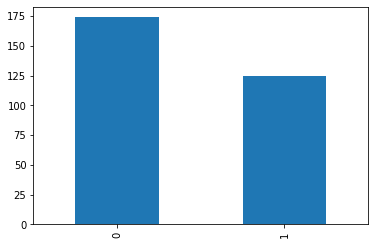

In [ ]:
#bar chart -distribution of categorical variable
data['diabetes'].value_counts().plot.bar()

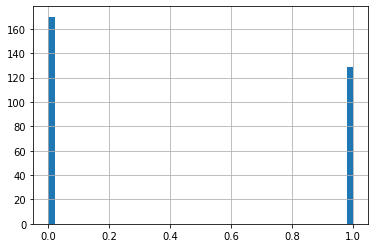

In [ ]:
#histogram of Anaemia
data['anaemia'].hist(bins=50)

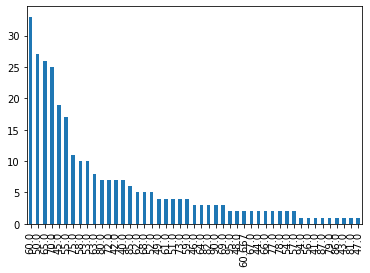

In [ ]:
#bar chart -distribution of categorical variable
data['age'].value_counts().plot.bar()

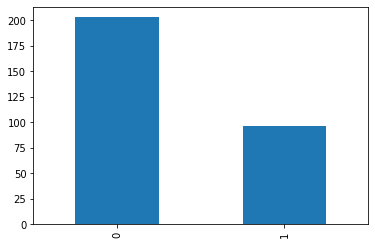

In [ ]:
#bar chart -distribution of categorical variable
data['smoking'].value_counts().plot.bar()

In [ ]:
#checking for the imbalanced data based on prevelantStroke
data['platelets'].value_counts()

263358.03    25
271000.00     4
221000.00     4
255000.00     4
228000.00     4
             ..
330000.00     1
217000.00     1
268000.00     1
358000.00     1
448000.00     1
Name: platelets, Length: 176, dtype: int64

In [ ]:
#checking for the missing values
data.isnull().values.any()

False

In [ ]:
print("The dataset \'heart_failure_clinical_records_dataset.csv'is now cleaned")

The dataset 'heart_failure_clinical_records_dataset.csv'is now cleaned


In [ ]:
print("The Dataset \'heart_failure_clinical_records_dataset.csv' is used for feature selection process")

The Dataset 'heart_failure_clinical_records_dataset.csv' is used for feature selection process


In [ ]:
#apply SelectKBest class to extract top 10 features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x=data.iloc[:,0:20] #independent columns
y=data.iloc[:,-1] #target columns
bestfeatures=SelectKBest(score_func=chi2,k=6)
fit=bestfeatures.fit(x,y)

In [ ]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

In [ ]:
#concat two dataframes for better visualization
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['values','Scores'] #naming the dataframe columns

In [ ]:
featureScores

,values,Scores
0,age,44.619455
1,anaemia,0.746593
2,creatinine_phosphokinase,1897.314839
3,diabetes,0.000657
4,ejection_fraction,79.072541
5,high_blood_pressure,1.221539
6,platelets,26135.771990
7,serum_creatinine,19.814118
8,serum_sodium,1.618175
9,sex,0.001956


In [ ]:
print(featureScores.nlargest(10,'Scores'))

                      values        Scores
6                  platelets  26135.771990
11                      time   3826.892661
2   creatinine_phosphokinase   1897.314839
12               DEATH_EVENT    203.000000
4          ejection_fraction     79.072541
0                        age     44.619455
7           serum_creatinine     19.814118
8               serum_sodium      1.618175
5        high_blood_pressure      1.221539
1                    anaemia      0.746593


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.01661336 0.00275845 0.00908668 0.00426209 0.02861714 0.00283798
 0.00737013 0.02462259 0.00961981 0.00295507 0.00318498 0.0924502
 0.79562152]


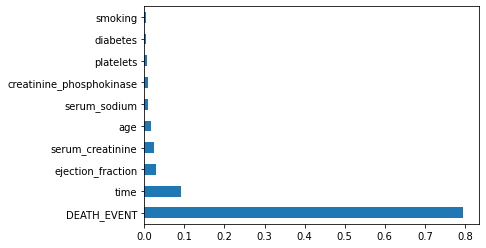

In [ ]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=0
)
x_train.shape,x_test.shape


((209, 13), (90, 13))

In [ ]:
x_train.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.103546,-0.076251,-0.109145,0.041097,0.036529,-0.122608,0.230260,-0.053552,0.126991,-0.003486,-0.243113,0.283962
anaemia,0.103546,1.000000,-0.174108,-0.001116,0.016675,-0.000288,-0.057571,0.084746,0.011435,-0.069047,-0.075218,-0.173388,0.083670
creatinine_phosphokinase,-0.076251,-0.174108,1.000000,0.031438,-0.030969,-0.053350,0.062173,-0.094213,0.031349,0.046024,-0.049206,0.033236,0.066964
diabetes,-0.109145,-0.001116,0.031438,1.000000,-0.049338,-0.073544,0.064254,-0.041290,-0.143692,-0.156991,-0.214756,0.035076,0.028679
ejection_fraction,0.041097,0.016675,-0.030969,-0.049338,1.000000,0.032981,0.070804,-0.141404,0.175284,-0.024584,-0.032331,0.141045,-0.340290
high_blood_pressure,0.036529,-0.000288,-0.053350,-0.073544,0.032981,1.000000,0.054839,-0.006653,-0.010785,-0.113573,-0.050109,-0.224703,0.055316
platelets,-0.122608,-0.057571,0.062173,0.064254,0.070804,0.054839,1.000000,-0.013113,0.044762,-0.178262,-0.027771,-0.016308,-0.037642
serum_creatinine,0.230260,0.084746,-0.094213,-0.041290,-0.141404,-0.006653,-0.013113,1.000000,-0.268645,0.100977,0.031675,-0.217647,0.295402
serum_sodium,-0.053552,0.011435,0.031349,-0.143692,0.175284,-0.010785,0.044762,-0.268645,1.000000,-0.031120,0.012007,0.122052,-0.222256
sex,0.126991,-0.069047,0.046024,-0.156991,-0.024584,-0.113573,-0.178262,0.100977,-0.031120,1.000000,0.432581,-0.034982,-0.041075


Pearson correlation


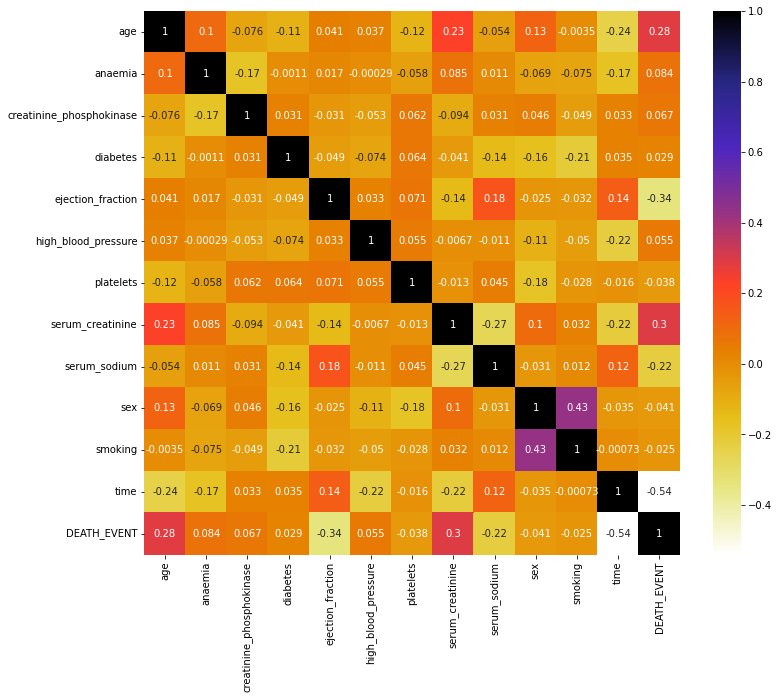

In [ ]:
import seaborn as sns
#using pearson Correlation
print("Pearson correlation")
plt.figure(figsize=(12,10))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset,threshold):
  col_corr=set() #set of all names of correlated columns
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
        if abs(corr_matrix.iloc[i,j])>threshold:
          colname=corr_matrix.columns[i]
          col_corr.add(colname)
  return col_corr

In [ ]:
corr_features=correlation(x_train,0.5)
len(set(corr_features))

1

In [ ]:
corr_features

{'DEATH_EVENT'}

In [ ]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
206,40.000,1,101,0,40,0,226000.0,0.8,141,0,0,187
188,60.667,1,151,1,40,1,201000.0,1.0,136,0,0,172
12,45.000,1,981,0,30,0,136000.0,1.1,137,1,0,11
219,55.000,0,582,1,35,1,371000.0,0.7,140,0,0,197
237,70.000,0,232,0,30,0,173000.0,1.2,132,1,0,210
...,...,...,...,...,...,...,...,...,...,...,...,...
76,70.000,0,92,0,60,1,317000.0,0.8,140,0,1,74
210,70.000,0,212,1,17,1,389000.0,1.0,136,1,1,188
223,47.000,0,582,0,25,0,130000.0,0.8,134,1,0,201
253,70.000,0,88,1,35,1,236000.0,1.2,132,0,0,215


In [ ]:
train = data.copy()
target = train.pop('smoking')
train.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,6,1


In [ ]:
num_features_opt = 25   # the number of features that we need to choose as a result
num_features_max = 40   # the somewhat excessive number of features, which we will choose at each stage
features_best = []

In [ ]:
#selectFromModel with linearSVC
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2
from sklearn.model_selection import train_test_split
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(train, target)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(train)
X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

In [ ]:
print(features_best)

[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'sex', 'time']]


In [ ]:
#using lasso
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
lasso = LassoCV(cv=3).fit(train, target)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(train)
X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

In [ ]:
# Visualization from https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
# but to k='all'
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(train, target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
features_best.append(featureScores.nlargest(num_features_max,'Score')['Feature'].tolist())
print(featureScores.nlargest(len(dfcolumns),'Score')) 

                     Feature        Score
6                  platelets  8628.665474
9                        sex    20.876039
10                      time     7.188474
4          ejection_fraction     4.966164
3                   diabetes     3.768842
2   creatinine_phosphokinase     2.826756
1                    anaemia     1.956889
5        high_blood_pressure     0.602129
0                        age     0.241532
7           serum_creatinine     0.171953
11               DEATH_EVENT     0.032347
8               serum_sodium     0.000984


In [ ]:
#by the SelectKBest with Chi-2
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
#Loading data
X,y=datasets.load_wine(return_X_y=True)
# k = 4 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
fit.scores_

array([5.44549882e+00, 2.80686046e+01, 7.43380598e-01, 2.93836955e+01,
       4.50263809e+01, 1.56230759e+01, 6.33343081e+01, 1.81548480e+00,
       9.36828307e+00, 1.09016647e+02, 5.18253981e+00, 2.33898834e+01,
       1.65400671e+04])

In [ ]:
X_new=test.fit_transform(X, y)

In [ ]:
print(X_new)

[[1.270000e+02 3.060000e+00 5.640000e+00 1.065000e+03]
 [1.000000e+02 2.760000e+00 4.380000e+00 1.050000e+03]
 [1.010000e+02 3.240000e+00 5.680000e+00 1.185000e+03]
 [1.130000e+02 3.490000e+00 7.800000e+00 1.480000e+03]
 [1.180000e+02 2.690000e+00 4.320000e+00 7.350000e+02]
 [1.120000e+02 3.390000e+00 6.750000e+00 1.450000e+03]
 [9.600000e+01 2.520000e+00 5.250000e+00 1.290000e+03]
 [1.210000e+02 2.510000e+00 5.050000e+00 1.295000e+03]
 [9.700000e+01 2.980000e+00 5.200000e+00 1.045000e+03]
 [9.800000e+01 3.150000e+00 7.220000e+00 1.045000e+03]
 [1.050000e+02 3.320000e+00 5.750000e+00 1.510000e+03]
 [9.500000e+01 2.430000e+00 5.000000e+00 1.280000e+03]
 [8.900000e+01 2.760000e+00 5.600000e+00 1.320000e+03]
 [9.100000e+01 3.690000e+00 5.400000e+00 1.150000e+03]
 [1.020000e+02 3.640000e+00 7.500000e+00 1.547000e+03]
 [1.120000e+02 2.910000e+00 7.300000e+00 1.310000e+03]
 [1.200000e+02 3.140000e+00 6.200000e+00 1.280000e+03]
 [1.150000e+02 3.400000e+00 6.600000e+00 1.130000e+03]
 [1.080000

In [ ]:
#by the recursive feature Elimination (RFE)with logistic Regression
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [ ]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features_max, step=10, verbose=5)
rfe_selector.fit(train, target)
rfe_support = rfe_selector.get_support()
rfe_feature = train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

12 selected features


In [ ]:
features_best.append(rfe_feature)


In [ ]:
#by the recursive feature elimination with random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=200), threshold='1.25*median')
embeded_rf_selector.fit(train, target)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200, n_jobs=None,
                                                 oob_score=False,

In [ ]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

4 selected features


In [ ]:
features_best.append(embeded_rf_feature)

In [ ]:
#variance threshold
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
#Check whether all features have a sufficiently different meaning
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=10)
np.shape(selector.fit_transform(data))
features_best.append(list(np.array(data.columns)[selector.get_support(indices=False)]))

In [ ]:
#selection of best features
features_best

[['age',
  'anaemia',
  'creatinine_phosphokinase',
  'diabetes',
  'ejection_fraction',
  'serum_creatinine',
  'serum_sodium',
  'sex',
  'time'],
 [],
 ['platelets',
  'sex',
  'time',
  'ejection_fraction',
  'diabetes',
  'creatinine_phosphokinase',
  'anaemia',
  'high_blood_pressure',
  'age',
  'serum_creatinine',
  'DEATH_EVENT',
  'serum_sodium'],
 ['age',
  'anaemia',
  'creatinine_phosphokinase',
  'diabetes',
  'ejection_fraction',
  'high_blood_pressure',
  'platelets',
  'serum_creatinine',
  'serum_sodium',
  'sex',
  'time',
  'DEATH_EVENT'],
 ['creatinine_phosphokinase', 'platelets', 'sex', 'time'],
 ['age',
  'creatinine_phosphokinase',
  'ejection_fraction',
  'platelets',
  'serum_sodium',
  'time']]

In [ ]:
main_cols_max = features_best[0]
for i in range(len(features_best)-1):
    main_cols_max = list(set(main_cols_max) | set(features_best[i+1]))
main_cols_max

['serum_sodium',
 'serum_creatinine',
 'time',
 'anaemia',
 'ejection_fraction',
 'high_blood_pressure',
 'diabetes',
 'sex',
 'age',
 'platelets',
 'creatinine_phosphokinase',
 'DEATH_EVENT']

In [ ]:
len(main_cols_max)

12

In [ ]:
# The element is in all lists of optimal features
main_cols_min = features_best[0]
for i in range(len(features_best)-1):
    main_cols_min = list(set(main_cols_min).intersection(set(features_best[i+1])))
main_cols_min

[]

In [ ]:
# Most common items in all lists of optimal features
main_cols = []
main_cols_opt = {feature_name : 0 for feature_name in data.columns.tolist()}
for i in range(len(features_best)):
    for feature_name in features_best[i]:
        main_cols_opt[feature_name] += 1
df_main_cols_opt = pd.DataFrame.from_dict(main_cols_opt, orient='index', columns=['Num'])
df_main_cols_opt.sort_values(by=['Num'], ascending=False).head(num_features_opt)

,Num
creatinine_phosphokinase,5
time,5
age,4
ejection_fraction,4
platelets,4
serum_sodium,4
sex,4
anaemia,3
diabetes,3
serum_creatinine,3


In [ ]:
main_cols = df_main_cols_opt.nlargest(num_features_opt, 'Num').index.tolist()
if not 'target' in main_cols:
    main_cols.append('target')
main_cols

['creatinine_phosphokinase',
 'time',
 'age',
 'ejection_fraction',
 'platelets',
 'serum_sodium',
 'sex',
 'anaemia',
 'diabetes',
 'serum_creatinine',
 'high_blood_pressure',
 'DEATH_EVENT',
 'smoking',
 'target']

In [ ]:
print("The creatinine_phosphokinase and time are the most important element in those optimal features ")

The creatinine_phosphokinase and time are the most important element in those optimal features 


In [ ]:
print("\'heart_failure_clinical_record_dataset.csv' is successfully feature selected")

'heart_failure_clinical_record_dataset.csv' is successfully feature selected
